# MNIST

Neste exercício, usaremos o conjunto de dados MNIST, que é um conjunto de 70.000 pequenas imagens de dígitos manuscritos por estudantes do ensino médio e funcionários do US Census Bureau. Cada imagem é rotulada com o dígito que representa. Esse conjunto foi estudado tanto que costuma ser chamado de “Olá Mundo” do Machine Learning: sempre que as pessoas criam um novo algoritmo de classificação, ficam curiosas para ver como ele será executado no MNIST. Sempre que alguém aprende o Machine Learning, mais cedo ou mais tarde ele enfrenta o MNIST.

https://en.wikipedia.org/wiki/MNIST_database

![https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)
              Referência: https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png

# Lendo dados do MNIST

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Conjunto de dados

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

# Observando um caractere do MNIST

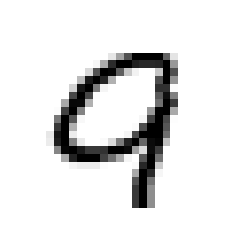

'7'

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = np.array(X[3000])
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

y[5000]

In [ ]:
some_digit.reshape(28, 28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

# Divida o dataset entre conjunto de treinamento e teste

Utilize 33% para o conjunto de teste

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

# Construa uma arvore de decisão e verifique a acurácia do modelo.

Utilize o algoritmos tradicional do `sklearn`

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_test_pred = clf_tree.predict(x_test)
y_train_pred = clf_tree.predict(x_train)
y_test_pred

array(['6', '3', '1', ..., '0', '7', '9'], dtype=object)

In [ ]:
print(np.concatenate((y_train_pred.reshape(len(y_train_pred),1),np.array(y_train,int).reshape(len(y_train_pred),1)),1))

[['1' 1]
 ['4' 4]
 ['6' 6]
 ...
 ['9' 9]
 ['6' 6]
 ['6' 6]]


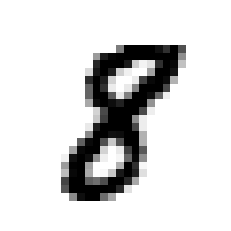

['8']


In [ ]:
some_digit = np.array(x_train[6000])
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

print(clf_tree.predict([x_train[6000]]))

In [ ]:
from sklearn.metrics import accuracy_score
print("A acurácia do treino na Árvore de Decisão é "+"{:.2%}". format(accuracy_score(y_train,y_train_pred)))
print("A acurácia do teste na Árvore de Decisão é "+"{:.2%}". format(accuracy_score(y_test,y_test_pred)))


A acurácia do treino na Árvore de Decisão é 100.00%
A acurácia do teste na Árvore de Decisão é 86.89%


# Compare a acurácia do modelo de árvore de decisão e um modelo de regressão logística (sklearn)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression()
clf_log.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_test_pred_log = clf_log.predict(x_test)
y_train_pred_log = clf_log.predict(x_train)
print(y_test_pred_log)
print(y_train_pred_log)

['6' '3' '1' ... '0' '9' '9']
['1' '4' '6' ... '9' '6' '6']


In [ ]:
print(np.concatenate((y_train_pred_log.reshape(len(y_train_pred_log),1),np.array(y_train,int).reshape(len(y_train_pred_log),1)),1))

[['1' 1]
 ['4' 4]
 ['6' 6]
 ...
 ['9' 9]
 ['6' 6]
 ['6' 6]]


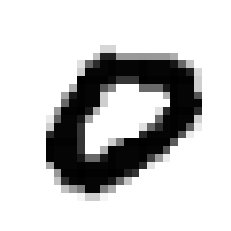

['0']


In [ ]:
some_digit = np.array(x_train[4000])
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

print(clf_log.predict([x_train[4000]]))

In [ ]:
from sklearn.metrics import accuracy_score

print("A acurácia do treino na Árvore de Decisão é "+"{:.2%}". format(accuracy_score(y_train,y_train_pred)))
print("A acurácia do treino na Regressão Logística é "+"{:.2%}". format(accuracy_score(y_train,y_train_pred_log)))

print("A acurácia do teste na Árvore de Decisão é "+"{:.2%}". format(accuracy_score(y_test,y_test_pred)))
print("A acurácia do teste na Regressão Logística é "+"{:.2%}". format(accuracy_score(y_test,y_test_pred_log)))

A acurácia do treino na Árvore de Decisão é 100.00%
A acurácia do treino na Regressão Logística é 93.57%
A acurácia do teste na Árvore de Decisão é 86.89%
A acurácia do teste na Regressão Logística é 92.13%


In [ ]:
mean_tree = (accuracy_score(y_train,y_train_pred)+accuracy_score(y_test,y_test_pred))/2
mean_log =  (accuracy_score(y_train,y_train_pred_log)+accuracy_score(y_test,y_test_pred_log))/2
print("A acurácia média da Árvore de Decisão é "+ "{:.2%}". format(mean_tree))
print("A acurácia média da Regressão Logística é "+"{:.2%}". format(mean_log))

A acurácia média da Árvore de Decisão é 93.45%
A acurácia média da Regressão Logística é 92.85%


# Desafio

Implemente o algoritmo CART utilizando apenas o numpy e pandas e aplique no dataset MNIST

In [ ]:
def split_sets(dataset, feature, threshold):
    """
    Return the indexes of dataset below and higher the
    threshold.
    """
    # Calculate the index of feature
    feature_index = dataset.feature_names.index(feature)

    # Evaluate left set
    left_set = set(
        [
            index
            for index, entry in enumerate(dataset.data)
            if entry[feature_index] <= threshold
        ]
    )

    # Calculate the right set by complement
    complete_set = set(range(len(dataset.data)))
    right_set = complete_set - left_set

    return left_set, right_set

In [ ]:
def gini(dataset, nodeset):

    labels = [dataset.target[i] for i in nodeset]

    # Counts labels in dataset
    counts = [
        labels.count(index) / len(nodeset)
        for index, label in enumerate(dataset.target_names)
    ]

    G = 1 - np.sum([count**2 for count in counts])
    return G

In [ ]:
def calculate_cost(dataset, feature, threshold):
    # Divide dataset

    left_set, right_set = split_sets(
        dataset, feature, threshold
    )
    gini_left = gini(dataset, left_set)
    gini_right = gini(dataset, right_set)

    total_len = len(left_set) + len(right_set)
    J = gini_left*len(left_set)/total_len + gini_right*len(right_set)/total_len
    return J

In [ ]:
mnist.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [ ]:
#def calculate_cost(dataset, feature)
dataset = mnist
feature = 'pixel1'
threshold = 2.75
y_train,y_test = split_sets(dataset, feature, threshold)